In [41]:
import numpy as np
import pandas as pd

In [42]:
iris = pd.read_csv("datasets/iris/iris.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
X = iris.drop('Species', axis=1)

In [44]:
y = iris['Species']

In [45]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
# Tenemos un problema de clasificación múltiple
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [47]:
# Vamos a cambiar nuestro array con los labels a 'one-hot-encoder'
y = encoder.fit_transform(y)
# Mostramos los 5 primeros. Hemos convertido las especies 'setosa', 'versicolor', 'virginica'
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [48]:
# Train and test split y creación de un Scaler para los datos.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Creación de un Scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [51]:
# Ahora transformamos los datos de train y test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [52]:
# Tengamos en cuenta que tenemos que guardar el objeto scaler para poder luego utilizarlo en procesos sucesivos

In [53]:
# Ahora tenemos que crear la red neuronal con Keras y TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
# Creación del modelo
model = Sequential()
# Capa de entrada
model.add(Dense(units=4, activation='relu', input_shape=[4, ]))
# Capa de salida
model.add(Dense(units=3, activation='softmax'))  # Porque tenemos una función de clasificación múltiple
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Agregación de un early stopping para evitar overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)

In [56]:
# Entrenamiento del modelo
model.fit(x=scaled_X_train, y=y_train, epochs=300,
         validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 0s 21ms/step - loss: 1.1356 - accuracy: 0.3250 - val_loss: 1.1171 - val_accuracy: 0.3667
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1324 - accuracy: 0.3250 - val_loss: 1.1134 - val_accuracy: 0.3667
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1297 - accuracy: 0.3250 - val_loss: 1.1098 - val_accuracy: 0.3667
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 1.1264 - accuracy: 0.3250 - val_loss: 1.1069 - val_accuracy: 0.3667
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 1.1236 - accuracy: 0.3250 - val_loss: 1.1041 - val_accuracy: 0.3667
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 1.1208 - accuracy: 0.3250 - val_loss: 1.1011 - val_accuracy: 0.3667
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 1.1181 - accuracy: 0.3250 - val_loss: 1.0982 - val_accuracy: 0.3667
Epoch 8/300
4/4 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.9249 - accuracy: 0.6583 - val_loss: 0.9019 - val_accuracy: 0.7000
Epoch 60/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9206 - accuracy: 0.6583 - val_loss: 0.8975 - val_accuracy: 0.7000
Epoch 61/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9162 - accuracy: 0.6583 - val_loss: 0.8931 - val_accuracy: 0.7000
Epoch 62/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9117 - accuracy: 0.6583 - val_loss: 0.8887 - val_accuracy: 0.7000
Epoch 63/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9073 - accuracy: 0.6583 - val_loss: 0.8844 - val_accuracy: 0.7000
Epoch 64/300
4/4 [==============================] - 0s 3ms/step - loss: 0.9028 - accuracy: 0.6583 - val_loss: 0.8800 - val_accuracy: 0.7000
Epoch 65/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8985 - accuracy: 0.6583 - val_loss: 0.8756 - val_accuracy: 0.7000
Epoch 66/300
4/4 [===============

4/4 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.6583 - val_loss: 0.6662 - val_accuracy: 0.7000
Epoch 118/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.6583 - val_loss: 0.6629 - val_accuracy: 0.7000
Epoch 119/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6583 - val_loss: 0.6597 - val_accuracy: 0.7000
Epoch 120/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.6583 - val_loss: 0.6564 - val_accuracy: 0.7000
Epoch 121/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.6667 - val_loss: 0.6533 - val_accuracy: 0.7000
Epoch 122/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6716 - accuracy: 0.6667 - val_loss: 0.6501 - val_accuracy: 0.7000
Epoch 123/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.6667 - val_loss: 0.6470 - val_accuracy: 0.7000
Epoch 124/300
4/4 [========

4/4 [==============================] - 0s 4ms/step - loss: 0.5465 - accuracy: 0.7333 - val_loss: 0.5261 - val_accuracy: 0.7000
Epoch 176/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7333 - val_loss: 0.5244 - val_accuracy: 0.7333
Epoch 177/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7333 - val_loss: 0.5228 - val_accuracy: 0.7333
Epoch 178/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7333 - val_loss: 0.5212 - val_accuracy: 0.7333
Epoch 179/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5400 - accuracy: 0.7333 - val_loss: 0.5196 - val_accuracy: 0.7333
Epoch 180/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7333 - val_loss: 0.5181 - val_accuracy: 0.7333
Epoch 181/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5369 - accuracy: 0.7417 - val_loss: 0.5165 - val_accuracy: 0.7333
Epoch 182/300
4/4 [========

4/4 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.8167 - val_loss: 0.4551 - val_accuracy: 0.8333
Epoch 234/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.8167 - val_loss: 0.4541 - val_accuracy: 0.8333
Epoch 235/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.8167 - val_loss: 0.4532 - val_accuracy: 0.8333
Epoch 236/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.8167 - val_loss: 0.4524 - val_accuracy: 0.8333
Epoch 237/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.8167 - val_loss: 0.4515 - val_accuracy: 0.8333
Epoch 238/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8167 - val_loss: 0.4506 - val_accuracy: 0.8333
Epoch 239/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8167 - val_loss: 0.4497 - val_accuracy: 0.8333
Epoch 240/300
4/4 [========

Epoch 291/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4348 - accuracy: 0.8500 - val_loss: 0.4126 - val_accuracy: 0.8667
Epoch 292/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.8500 - val_loss: 0.4120 - val_accuracy: 0.8667
Epoch 293/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.8500 - val_loss: 0.4114 - val_accuracy: 0.8667
Epoch 294/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8417 - val_loss: 0.4108 - val_accuracy: 0.8667
Epoch 295/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8417 - val_loss: 0.4102 - val_accuracy: 0.8667
Epoch 296/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.8417 - val_loss: 0.4096 - val_accuracy: 0.8667
Epoch 297/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.8417 - val_loss: 0.4091 - val_accuracy: 0.8667
Epoch 298/300

In [57]:
# Estudiemos las métricas
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.135561,0.325000,1.117146,0.366667
1,1.132389,0.325000,1.113400,0.366667
2,1.129674,0.325000,1.109834,0.366667
3,1.126381,0.325000,1.106911,0.366667
4,1.123575,0.325000,1.104068,0.366667
...,...,...,...,...
295,0.431935,0.841667,0.409609,0.866667
296,0.431351,0.841667,0.409065,0.866667
297,0.430840,0.841667,0.408571,0.866667
298,0.430276,0.850000,0.408026,0.866667


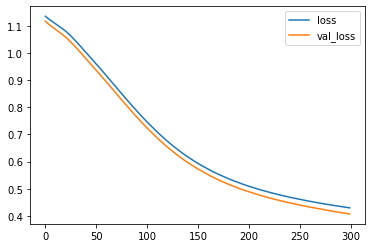

In [58]:
# Dibujemos en un gráfico las funciones loss y val_loss
metrics[['loss', 'val_loss']].plot()

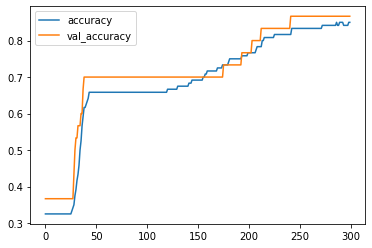

In [60]:
# Dibujemos en un gráfico las funciones accuracy y val_accuracy
metrics[['accuracy', 'val_accuracy']].plot()

In [62]:
# Evaluación del modelo
model.evaluate(scaled_X_test, y_test, verbose=0) # Lo que obtendremos es el final_loss y el final_accuracy

[0.40748628973960876, 0.8666666746139526]

In [64]:
# Aquí es el punto en el que tenemos que decidir si estas métricas son lo suficientemente buenas
# Hemos obtenido el 80% de precisión. ¿Es suficiente? -> Sí, entonces ...
# Preparemos nuestro modelo para el deployment.
# Lo que quiero es conseguir el mejor modelo posible. Para ello, utilizo ahora todos los datos.
# Voy a aplicar nuestro Scaler a todos los datos
scaled_X = scaler.fit_transform(X)

In [65]:
# Creamos ahora un nuevo modelo usando todos los datos
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4, ]))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(scaled_X, y, epochs=300)

Epoch 1/300
5/5 [==============================] - 0s 532us/step - loss: 0.9293 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 631us/step - loss: 0.9236 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 580us/step - loss: 0.9188 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 700us/step - loss: 0.9138 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 627us/step - loss: 0.9089 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 596us/step - loss: 0.9039 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 695us/step - loss: 0.8992 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 606us/step - loss: 0.8944 - accuracy: 0.3333
Epoch 9/300
5/5 [==============================] - 0s 561us/step - loss: 0.8897 - accuracy: 0.3333
Epoch 10/300
5/5 [==============================] - 0s 627us/step - loss: 0.8853 - accuracy: 0.3333
Epoch 11/

5/5 [==============================] - 0s 577us/step - loss: 0.6201 - accuracy: 0.7200
Epoch 84/300
5/5 [==============================] - 0s 640us/step - loss: 0.6169 - accuracy: 0.7200
Epoch 85/300
5/5 [==============================] - 0s 619us/step - loss: 0.6138 - accuracy: 0.7200
Epoch 86/300
5/5 [==============================] - 0s 561us/step - loss: 0.6109 - accuracy: 0.7200
Epoch 87/300
5/5 [==============================] - 0s 809us/step - loss: 0.6080 - accuracy: 0.7267
Epoch 88/300
5/5 [==============================] - 0s 596us/step - loss: 0.6050 - accuracy: 0.7267
Epoch 89/300
5/5 [==============================] - 0s 608us/step - loss: 0.6020 - accuracy: 0.7267
Epoch 90/300
5/5 [==============================] - 0s 720us/step - loss: 0.5991 - accuracy: 0.7267
Epoch 91/300
5/5 [==============================] - 0s 569us/step - loss: 0.5962 - accuracy: 0.7267
Epoch 92/300
5/5 [==============================] - 0s 587us/step - loss: 0.5932 - accuracy: 0.7267
Epoch 93/300


5/5 [==============================] - 0s 694us/step - loss: 0.4417 - accuracy: 0.9133
Epoch 165/300
5/5 [==============================] - 0s 767us/step - loss: 0.4403 - accuracy: 0.9133
Epoch 166/300
5/5 [==============================] - 0s 598us/step - loss: 0.4389 - accuracy: 0.9133
Epoch 167/300
5/5 [==============================] - 0s 653us/step - loss: 0.4373 - accuracy: 0.9200
Epoch 168/300
5/5 [==============================] - 0s 673us/step - loss: 0.4358 - accuracy: 0.9200
Epoch 169/300
5/5 [==============================] - 0s 585us/step - loss: 0.4344 - accuracy: 0.9200
Epoch 170/300
5/5 [==============================] - 0s 648us/step - loss: 0.4330 - accuracy: 0.9200
Epoch 171/300
5/5 [==============================] - 0s 668us/step - loss: 0.4316 - accuracy: 0.9200
Epoch 172/300
5/5 [==============================] - 0s 657us/step - loss: 0.4302 - accuracy: 0.9200
Epoch 173/300
5/5 [==============================] - 0s 535us/step - loss: 0.4287 - accuracy: 0.9200
Epoc

5/5 [==============================] - 0s 658us/step - loss: 0.3468 - accuracy: 0.9467
Epoch 246/300
5/5 [==============================] - 0s 694us/step - loss: 0.3457 - accuracy: 0.9467
Epoch 247/300
5/5 [==============================] - 0s 572us/step - loss: 0.3447 - accuracy: 0.9467
Epoch 248/300
5/5 [==============================] - 0s 543us/step - loss: 0.3440 - accuracy: 0.9467
Epoch 249/300
5/5 [==============================] - 0s 607us/step - loss: 0.3429 - accuracy: 0.9467
Epoch 250/300
5/5 [==============================] - 0s 615us/step - loss: 0.3419 - accuracy: 0.9467
Epoch 251/300
5/5 [==============================] - 0s 619us/step - loss: 0.3409 - accuracy: 0.9533
Epoch 252/300
5/5 [==============================] - 0s 595us/step - loss: 0.3402 - accuracy: 0.9467
Epoch 253/300
5/5 [==============================] - 0s 644us/step - loss: 0.3390 - accuracy: 0.9467
Epoch 254/300
5/5 [==============================] - 0s 641us/step - loss: 0.3381 - accuracy: 0.9467
Epoc

In [67]:
# Vemos que ahora hemos obtenido una precisión del 97%, es mayor que la obtuvimos antes.
# Pero la que obtuvimos antes es la válida.

In [69]:
# Ahora tenemos que guardar el modelo
model.save("final_iris_model.h5")

In [71]:
# Ahora tenemos que guardar el Scaler
import joblib
joblib.dump(scaler, "iris_scaler.pkl")

['iris_scaler.pkl']

In [72]:
# Predicción sobre una simple flor
from tensorflow.keras.models import load_model

In [73]:
# Cargamos el modelo
flower_model = load_model("final_iris_model.h5")

In [76]:
# Cargamos el scaler
flower_scaler = joblib.load("iris_scaler.pkl")

In [ ]:
# Hagamos una predicción.